# FastAI.jl for Colab
You can find original GPU template from [documentation](https://colab.research.google.com/gist/lorenzoh/2fdc91f9e42a15e633861c640c68e5e8) 

## Setup

1. Work on a copy of this notebook.
2. Change Runtime to GPU for faster results.
3. Execute the code below.
4. Reload this page by pressing F5.

![](image.jpg)

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.2"
export JULIA_PACKAGES="CUDA IJulia CairoMakie"
JULIA_NUM_THREADS="2"
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  echo "Installing Julia packages, this may take up to 15 minutes. "
  julia -e 'using Pkg; Pkg.add(["CUDA", "IJulia", "CairoMakie"]); Pkg.add(Pkg.PackageSpec(url="https://github.com/FluxML/FastAI.jl")); Pkg.precompile()' &> /dev/null

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.2 on the current Colab Runtime...
2021-09-07 05:20:43 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.2-linux-x86_64.tar.gz [112946671/112946671] -> "/tmp/julia.tar.gz" [1]
Installing Julia packages, this may take up to 15 minutes. 
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


## FastAI.jl

In [ ]:
versioninfo()

Julia Version 1.6.2
Commit 1b93d53fc4 (2021-07-14 15:36 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, haswell)
Environment:
  JULIA_NUM_THREADS = 2


In [ ]:
using FastAI
data, blocks = loaddataset("imagenette2-160", (Image, Label))

stdin> y
This program has requested access to the data dependency fastai-imagenette2-160.
which is not currently installed. It can be installed automatically, and you will not see this message again.

"imagenette2-160" from the fastai dataset repository (https://course.fast.ai/datasets)

A subset of 10 easily classified classes from Imagenet: tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute

Download size: ???



Do you want to download the dataset from https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz to "/root/.julia/datadeps/fastai-imagenette2-160"?
[y/n]

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)


Extracting archive: 
--
Path = 
Type = tar
Code Page = UTF-8

Everything is Ok

Folders: 23
Files: 13397
Size:       107794109
Compressed: 6872064


┌ Info: Downloading
│   source = https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
│   dest = /root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160.tgz
│   progress = 1.0
│   time_taken = 2.69 s
│   time_remaining = 0.0 s
│   average_speed = 35.138 MiB/s
│   downloaded = 94.417 MiB
│   remaining = 0 bytes
│   total = 94.417 MiB
└ @ HTTP /root/.julia/packages/HTTP/5e2VH/src/download.jl:128


(mapobs(loadfile, ["/root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160/train/n01440764/I…]), mapobs(parentname, ["/root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160/train/n01440764/I…]))

class = "n01440764"


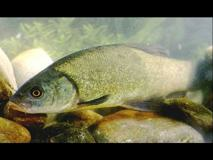

In [ ]:
image, class = sample =  getobs(data, 500)
@show class
image

In [ ]:
method = ImageClassificationSingle(blocks)
method

BlockMethod(Image{2} -> Label{String})

In [ ]:
method = BlockMethod(
    blocks,
    (
        ProjectiveTransforms((128, 128)),
        ImagePreprocessing(),
        OneHot()
    )
)

BlockMethod(Image{2} -> Label{String})

In [ ]:
dls = methoddataloaders(data, method)
model = methodmodel(method, Models.xresnet18())
lossfn = methodlossfn(method)
learner = Learner(model, dls, ADAM(), lossfn, ToGPU(), Metrics(accuracy))

Learner()

In [ ]:
fitonecycle!(learner, 10, 0.002)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:07:39
Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:28
Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:34
Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:16
Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:32
Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:17
Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:30
Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:17
Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:31
Epoch 5 ValidationPhase(): 100%|████████████████████████| Time: 0:00:17
Epoch 6 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:30
Epoch 6 ValidationPhase(): 100%|████████████████████████| Time: 0:00:16
Epoch 7 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:29
Epoch 7 ValidationPhase(): 100%|████████████████████████| Time: 

┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   1.0 │ 1.75974 │  0.43412 │
└───────────────┴───────┴─────────┴──────────┘
┌─────────────────┬───────┬────────┬──────────┐
│           Phase │ Epoch │   Loss │ Accuracy │
├─────────────────┼───────┼────────┼──────────┤
│ ValidationPhase │   1.0 │ 1.4792 │  0.55747 │
└─────────────────┴───────┴────────┴──────────┘
┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   2.0 │ 1.35166 │  0.57549 │
└───────────────┴───────┴─────────┴──────────┘
┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   2.0 │ 1.16688 │  0.62853 │
└─────────────────┴───────┴─────────┴──────────┘
┌───────────────┬───────┬─────────┬──────────

Epoch 10 TrainingPhase(): 100%|█████████████████████████| Time: 0:03:31
Epoch 10 ValidationPhase(): 100%|███████████████████████| Time: 0:00:16


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │  10.0 │ 0.06087 │  0.98489 │
└───────────────┴───────┴─────────┴──────────┘
┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │  10.0 │ 0.58408 │  0.83194 │
└─────────────────┴───────┴─────────┴──────────┘


In [ ]:
learner = methodlearner(method, data, Models.xresnet18(), ToGPU(), Metrics(accuracy))
fitonecycle!(learner, 10, 0.002)

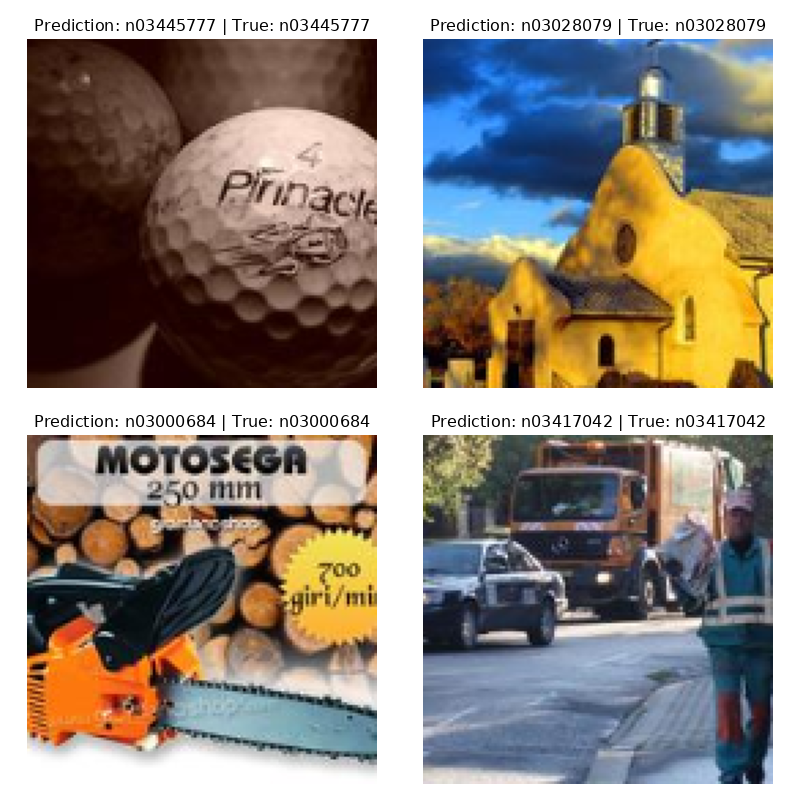

In [ ]:
import CairoMakie
plotpredictions(method, learner)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c681a5a-1762-4c44-bebe-0bbb98ec0fe6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>